In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
sns.set_theme()

# Examine distribution of defendants across COMPAS screening dates

- To construct their two-year recidivism sub-datasets, ProPublica presumably wanted to keep people observed
for at least two years at the end of the time window for which ProPublica collected criminal history data, on
April 1, 2016. Therefore, we should not have expected to see anybody in the two-year datasets with COMPAS
screening (or arrest) dates after April 1, 2014 (i.e. less than two years prior to ProPublica’s data collection). 
- However, as we will see further below, there are many people in ProPublica’s two-year recidivism datasets
who do indeed have COMPAS screening dates after this potential cutoff, all the way through December 31,
2014, which is the end date of the original database.
- Taking a closer look at these datasets, we see that ProPublica correctly dropped non-recidivists with COMPAS
screening dates post 4/1/2014. However, it kept people with COMPAS screening dates after 4/1/2014 if they
recidivated. 

In [70]:
df = pd.read_csv("../../data-ProPublica/compas-scores-two-years.csv", parse_dates=["compas_screening_date"])

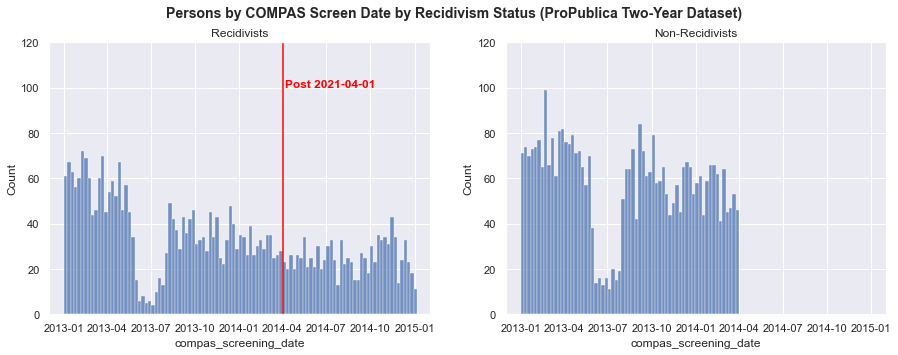

In [90]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Persons by COMPAS Screen Date by Recidivism Status (ProPublica Two-Year Dataset)", fontsize=14, fontweight="bold")
plt.setp(axes, ylim=(0,120), xlim=[datetime.date(2012, 12, 1), datetime.date(2015, 2, 1)])

df_recid = df[df["is_recid"]==1]
df_nonrecid = df[df["is_recid"]==0]

sns.histplot(x="compas_screening_date", data=df_recid, ax=axes[0], binwidth=7)
axes[0].axvline(datetime.date(2014, 4, 1), color="red")
axes[0].text(datetime.date(2014, 4, 7),100,'Post 2021-04-01', color="red", fontweight="bold")
axes[0].set_title("Recidivists")

sns.histplot(x="compas_screening_date", data=df_nonrecid, ax=axes[1], binwidth=7)

axes[1].set_title("Non-Recidivists");


>ProPublica made a substantial data processing error when it created these datasets. Namely, it **failed to implement a two-year window sample cutoff for recidivists** in such datasets (whereas it did implement such a sample cutoff for non-recidivists).  As a result, ProPublica incorrectly kept a disproportionate share of recidivists in such datasets. This data processing mistake leads to biased two-year recidivism datasets, with artificially high recidivism rates<br>
<br> See https://github.com/mbarenstein/ProPublica_COMPAS_Data_Revisited

# Correct ProPublica Two-Year Dataset

In [72]:
#Implement cutoff after 4/1/2014
df_corrected = df[df["compas_screening_date"]<="2014-04-01"]

print("No rows in Original dataset:", df.shape[0])
print("No rows in Corrected dataset:", df_corrected.shape[0])

No rows in Original dataset: 7214
No rows in Corrected dataset: 6216


As shown above, this drops 998 recidivists who ProPublica incorrectly kept in the two-year (general recidivism) dataset. They are dropped because they have COMPAS screen dates post-April 1, 2014.

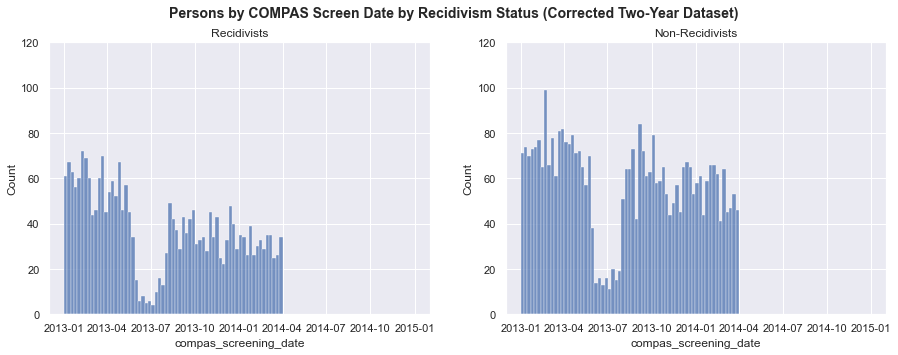

In [73]:
#Recreate charts from above to visually confirm results
fig_corr, axes_corr = plt.subplots(1,2, figsize=(15,5))
fig_corr.suptitle("Persons by COMPAS Screen Date by Recidivism Status (Corrected Two-Year Dataset)", fontsize=14, fontweight="bold")
plt.setp(axes_corr, ylim=(0,120), xlim=[datetime.date(2012, 12, 1), datetime.date(2015, 2, 1)])

df_corr_recid = df_corrected[df_corrected["is_recid"]==1]
df_corr_nonrecid = df_corrected[df_corrected["is_recid"]==0]

sns.histplot(x="compas_screening_date", data=df_corr_recid, ax=axes_corr[0], binwidth=7)
            
axes_corr[0].set_title("Recidivists")

sns.histplot(x="compas_screening_date", data=df_corr_nonrecid, ax=axes_corr[1], binwidth=7)

axes_corr[1].set_title("Non-Recidivists");


## Save corrected dataset as .csv

In [74]:
df_corrected.to_csv("compas-scores-two-years-corrected.csv", index=False)